In [13]:
#Step 1 - Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#Step 2- Retrieve the Data
titanic = pd.read_csv("Titanic-Dataset.csv")

In [15]:
titanic.head() # au niveau de colone Cabin il  y a des valeurs null  avant faire data cleaning on doit analyser data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Survived', ylabel='count'>

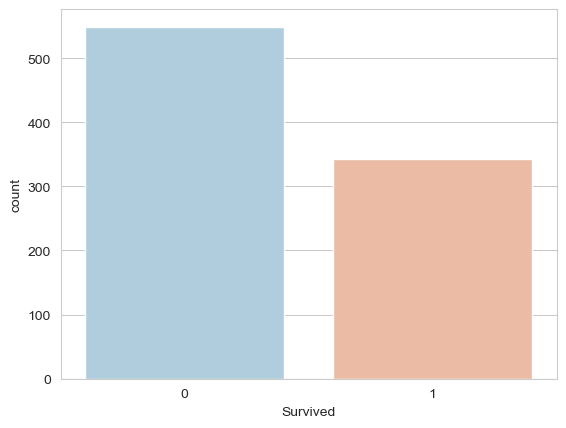

In [16]:
#Step 3 - Exploratory Data Analysis 
#on doit conteur les nombres de personnes qui sont pas surveicut en bleu et non nombres de personnes qui sont pas surveicut orange sa fait dire que il y a apepré de 300 personne qui sont surveicut et plus de 500 personnes qui sont pas surveicut
sns.set_style("whitegrid")
sns.countplot(x="Survived",data=titanic,palette="RdBu_r")

<AxesSubplot:xlabel='Survived', ylabel='count'>

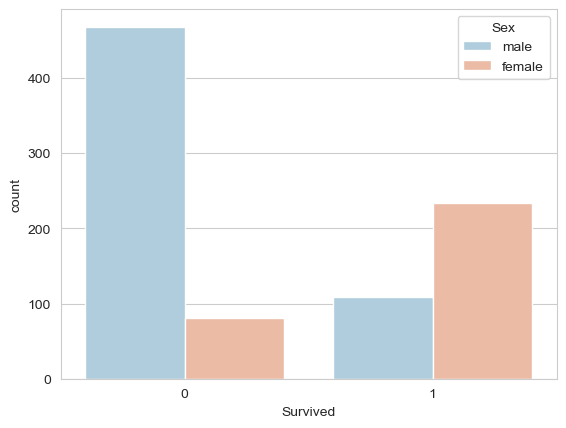

In [20]:
##on doit fait la meme chose mais en séparant les hommes et les femmes
sns.countplot(x='Survived',hue='Sex',data=titanic,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

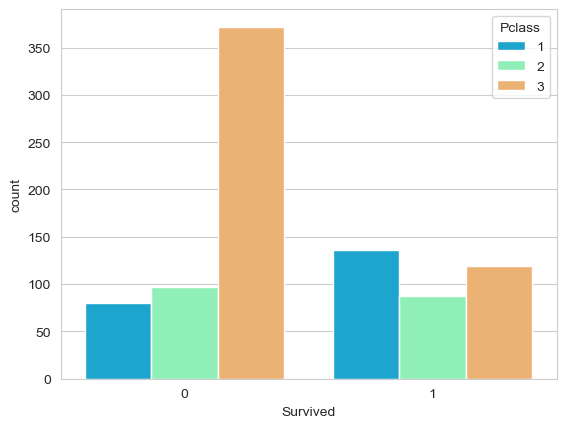

In [19]:
#on doit fait la meme chose mais en par Numero de Class
sns.countplot(x='Survived',hue='Pclass',data=titanic,palette='rainbow')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

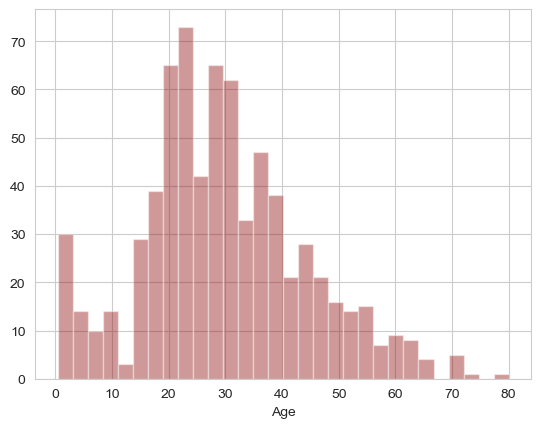

In [21]:
  #on peut distplot de l'age
sns.distplot(titanic["Age"],kde=False,color='darkred',bins=30)

In [22]:
#our Data Cleaning
titanic.info()#au niveau Age et Cabin les data ne sont pas complet et encore algorithme pour qu'il fonctionner il  a besoin de valeur chiffré soit float int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

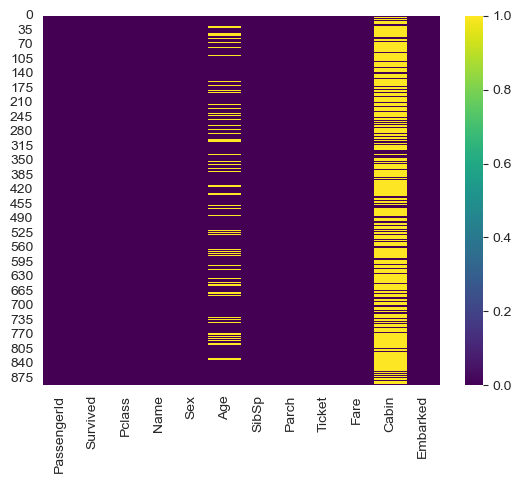

In [23]:
sns.heatmap(titanic.isnull(),cmap='viridis')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

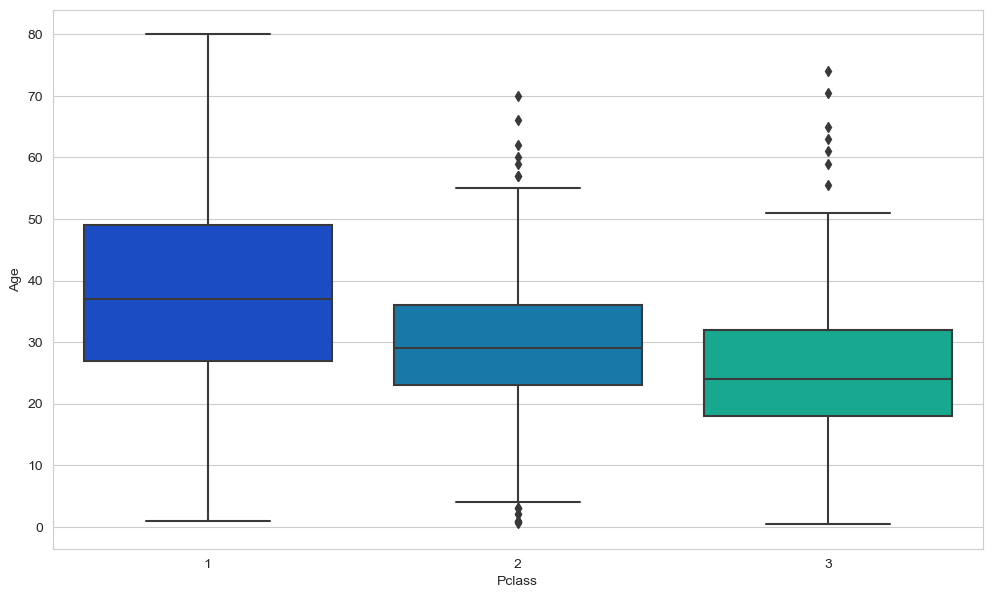

In [24]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=titanic,palette='winter')

In [26]:
def input_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [28]:
titanic['Age']=titanic[['Age','Pclass']].apply(input_age,axis=1)

<AxesSubplot:>

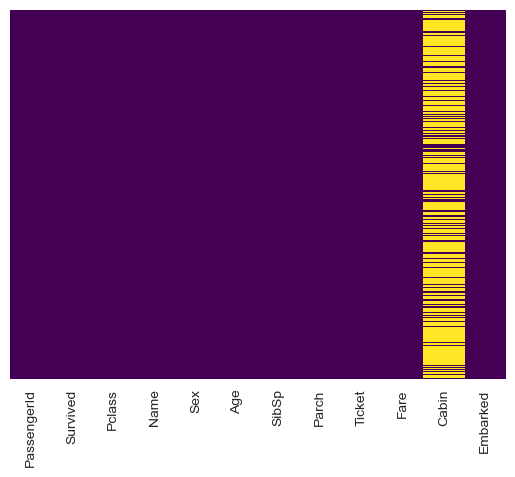

In [29]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [30]:
#Pour la colone Cabine il a seulement 204 qui sont pas null  sa fait dire que trés dificille pour remplir le reste qui sont null et enocre le valeur ce sont de code qui sont pas important pour algorithme donc on doit carament supprimer la colonne
titanic.drop('Cabin',axis=1,inplace=True)
#titanic.fropna(inplace=True

In [38]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

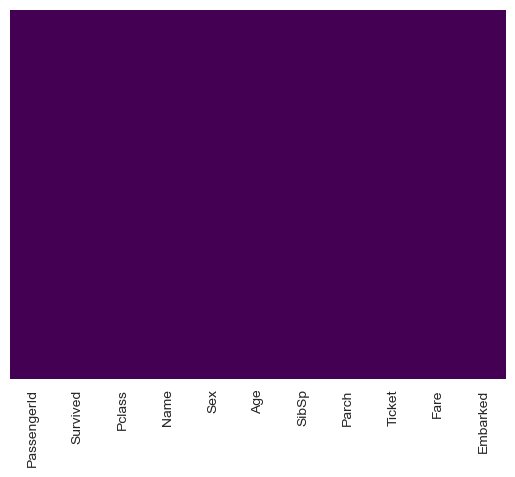

In [32]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [33]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [43]:
#on doit changer Sex et Embarked => get_dummies : permet de changer un objet à un valeur numeric
sex = pd.get_dummies(titanic['Sex'],drop_first=True)

In [44]:
#Avec Embarked
embark=pd.get_dummies(titanic['Embarked'],drop_first=True)

In [42]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [45]:
titanic.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [46]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [47]:
titanic = pd.concat([titanic,sex,embark],axis=1)

In [48]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [49]:
#Step4 Preparing the data into train and test
#Train Test Split
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test , Y_train , Y_test = train_test_split(titanic.drop('Survived',axis=1),titanic['Survived'],test_size=0.30,random_state=101)

In [52]:
print(X_train)

     PassengerId  Pclass   Age  SibSp  Parch      Fare  male  Q  S
520          521       1  30.0      0      0   93.5000     0  0  1
510          511       3  29.0      0      0    7.7500     1  1  0
446          447       2  13.0      0      1   19.5000     0  0  1
2              3       3  26.0      0      0    7.9250     0  0  1
691          692       3   4.0      0      1   13.4167     0  0  0
..           ...     ...   ...    ...    ...       ...   ... .. ..
575          576       3  19.0      0      0   14.5000     1  0  1
838          839       3  32.0      0      0   56.4958     1  0  1
337          338       1  41.0      0      0  134.5000     0  0  0
523          524       1  44.0      0      1   57.9792     0  0  0
863          864       3  24.0      8      2   69.5500     0  0  1

[623 rows x 9 columns]


In [53]:
#Step 5 Build a Logistic Regression model for classification
from sklearn.linear_model import LogisticRegression

In [54]:
logmodel = LogisticRegression(solver='liblinear')

In [55]:
#Step 6 : Train the model

In [56]:
logmodel.fit(X_train,Y_train)

LogisticRegression(solver='liblinear')

In [58]:
#Step 7 : Evaluation
predictions = logmodel.predict(X_test)

In [64]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       154
           1       0.79      0.64      0.71       114

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.76       268
weighted avg       0.78      0.78      0.77       268



In [66]:
from sklearn .metrics import confusion_matrix
print('Confussion matrix : \n',confusion_matrix(Y_test,predictions))
tn, fp,fn,tp=confusion_matrix(Y_test,predictions).ravel()
print(tn,fp,fn,tp)

Confussion matrix : 
 [[135  19]
 [ 41  73]]
135 19 41 73


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


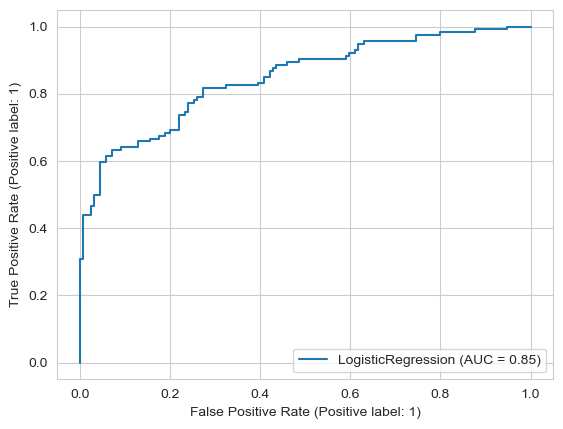

In [69]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(logmodel,X_test,Y_test)
plt.show()

In [75]:
#Test pour model
#Test 1
data = [[182,1,2.0,0,2,75,1,0,1]]
df = pd.DataFrame(data,columns=['PassengerId','Pclass','Age','SibSp','Parch','Fare','male','Q','S'])
logmodel.predict(df)
#PassengerId	Survived	Pclass	Age	SibSp	Parch	Fare	male	Q	S

array([1], dtype=int64)

In [77]:
#Test pour model
#Test 2 => le resultat : cette personne st 
data = [[182,3,2.0,0,2,75,1,0,1]]
df = pd.DataFrame(data,columns=['PassengerId','Pclass','Age','SibSp','Parch','Fare','male','Q','S'])
logmodel.predict(df)
#PassengerId	Survived	Pclass	Age	SibSp	Parch	Fare	male	Q	S

array([0], dtype=int64)